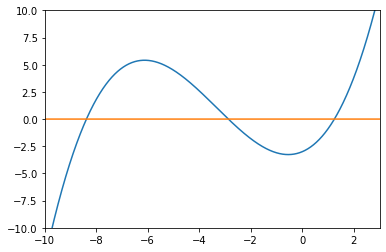

Root is at -8.379302978515625  after  15  iterations, with a precision of  5.1380538145906485e-05
Root is at -2.86871337890625  after  14  iterations, with a precision of  9.322885512474954e-06
Root is at 1.248046875  after  9  iterations, with a precision of  6.627961993199705e-05


In [12]:
#1a
import matplotlib.pyplot as plt
import numpy as np
#define the given function
def func1(x):
    return .1*x**3+x**2+x-3


# Always a good idea to draw the function first
t = np.arange(-10.0, 3.0, 0.01)
s = func1(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.ylim(-10,10)
plt.xlim(-10,3)
plt.show()

#Thus we have initial guesses for later use: x = -8,-3,1

#bisection, taken from Lecture 5
def bisection(xmin,xmax, Nmax, eps,f): #xmin is the left bound and xmax is the right bound, Nmax is the iteration limit, eps is the error, and f is the function
    for i in range(0,Nmax):
        x=(xmin+xmax)/2.
        if(f(xmin)*f(x)>0):
             xmin = x
        else:
             xmax = x
        if(abs(f(x))<eps):
            print("Root is at",x," after ",i," iterations, with a precision of ",abs(f(x)))
            break
    return x

#Test centered at -8, take xmin and xmax to be a reasonable distance away
root = bisection(-9,-7,100,1e-4,func1)
#Now for -3
root = bisection(-4,-2,100,1e-4,func1)
#Now for the positive root
root = bisection(0,2,100,1e-4,func1)

In [13]:
#1b

#Central Difference derivative, from homework 4
def dericd(y,x,dx):
    return (y(x+dx/2)-(y(x-dx/2)))/dx

#Newton Raphson taken from lecture 5
def newtonraphson(x0,dx, Nmax, eps,f): # update x0 for Nmax times until reaching eps; dx is used in the central difference scheme to calculate the derivative 
    for i in range(0,Nmax):
        df =  dericd(f,x0,dx)
        x0 =  x0-(f(x0)/df)
        if(abs(f(x0))<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
            break
    return x0

#Use same guesses as before
#Test centered at -8, take xmin and xmax to be a reasonable distance away
root = newtonraphson(-8,.01,100,1e-4,func1)
#Now for -3
root = newtonraphson(-3,.01,100,1e-4,func1)
#Now for the positive root
root = newtonraphson(1,.01,100,1e-4,func1)

Root is at -8.379312794752849  after  2  iterations, with a precision of  6.968033332555024e-07
Root is at -2.868717531636502  after  1  iterations, with a precision of  9.788372778984922e-08
Root is at 1.248030167134172  after  2  iterations, with a precision of  6.038149180653818e-08


In [18]:
#2a
import numpy as np

#function of interest
def func2(x):
    return np.log(x)

#Forward difference taken from lecture 4
def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx
#Central Difference derivative, from homework 4
def dericd(y,x,dx):
    return (y(x+dx/2)-(y(x-dx/2)))/dx

#2b

def rel_error(x0): #find relative error from .1, which is dln(10)/dx
    return (x0-.1)/.1

fdr = derifw(func2,10,.01)
cdr = dericd(func2,10,.01)
ferr = rel_error(fdr)
cerr = rel_error(cdr)
print('Forward difference method derivative of ln(x) at 10: ',fdr)

print('Relative error for forward difference is ',ferr)

print('Central difference method derivative of ln(x) at 10: ',cdr)

print('Relative error for central difference is ',cerr)


#2c
# forward difference for the first derivative and central difference for the second derivative
def dersecond1(y,x,dx):
        return (y(x+3.*dx/2.)-y(x+dx/2.)-(y(x+dx/2.)-y(x-dx/2.)))/dx/dx

ddr = dersecond1(func2,10,.01)
print('Second derivative of ln(x) at 10: ',ddr)    

Forward difference method derivative of ln(x) at 10:  0.09995003330831587
Relative error for forward difference is  -0.0004996669168413903
Central difference method derivative of ln(x) at 10:  0.10000000833332301
Relative error for central difference is  8.333323003872906e-08
Second derivative of ln(x) at 10:  -0.009990012483918065


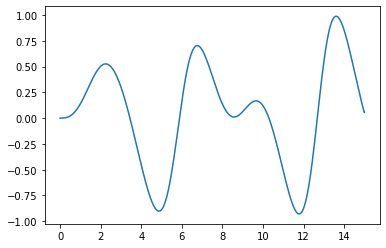

In [49]:
import numpy as np

#3
#break problem into multiple 1st order differential equations
#define y vector
y = np.zeros(2)
#for our purposes y = y[0], y'= y[1]
def func3(x,y):
    #system of 1st order ODEs
    f = np.zeros(2)
    #f[0] = dy/dx, f[1] = d2y/dy2
    f[0] = y[1]
    #solve given equation for y'', as a function of y and y'
    f[1] = np.sin(x)-y[0]*(3+y[1])
    return f
    
#RK4 taken from lecture
def rk4(x, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*func3(x,y)
    k2=h*func3(x+0.5*h,y+0.5*k1)
    k3=h*func3(x+0.5*h,y+0.5*k2)
    k4=h*func3(x+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

xp=[]
yp=[]
x = 0
h = .01
xend = 15
while(x<xend):
    if((x+h)>xend):
        h=xend-x
    y = rk4(x,h,y,2)
    xp=np.append(xp,x)
    yp=np.append(yp,y[0])
    x = x+h

plt.plot(xp,yp)

plt.show()